## Fraunhoferova difrakcija na kvadratnoj i kružnoj pukotini
#### Kod je pisan u Python programskom jeziku koristeći Jupyter notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.fftpack import fft      #paket za FFT
from scipy.fftpack import ifftshift,  fftshift

from mpl_toolkits.mplot3d import Axes3D   #paket za 3d plot
plt.style.use('dark_background')          # izbor boja za plot
plt.rcParams['image.cmap'] = 'plasma' 

In [2]:
N=1048   #rezolucija
L=5.    # širina zaslona na kojem se javlja difrakcioni uzorak
lamb=632*10**(-6)  #talasna dužina svjetlosti u milimetrima (mm)
w=0.05  #širina otvora (mm)
z=100.    #udaljenost otvor - zaslon (mm)
k=2*np.pi/lamb   #talasni broj

delta_src=L/N     #prostorna frekvencija

#definisanje ravni otvora
xv=np.linspace(-N/2,N/2-1,N)
yv=np.linspace(-N/2,N/2-1,N)
[x1,y1]=np.meshgrid(xv,yv)
x1=x1*delta_src  #(mm)
y1=y1*delta_src  # (mm) 
 
#definisanje kvadratnog otvora
X=np.where(np.abs(x1)<w/2,1,0)
Y=np.where(np.abs(y1)<w/2,1,0)


u1=X*Y   #elektricno polje na otvoru ima konstantnu vrijednost

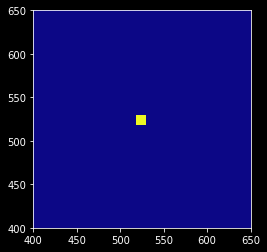

In [3]:
#crtanje otvora
plt.imshow(u1)
plt.ylim(400,650)
plt.xlim(400,650)
plt.show()

In [4]:
# FOURIEROVA TRANSFORMACIJA - izracunavanje integrala
g=u1
G=fftshift(np.fft.fft2(g))
h=np.exp(1j*k*z)/1j*lamb*z*np.exp(1j*np.pi/(lamb*z)*(x1**2+y1**2))
u2=h*G  #Vrijednost električnog polja u ravni zaslona

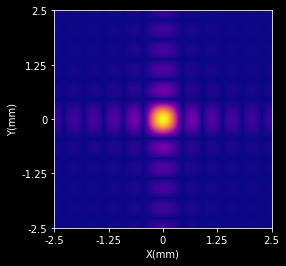

In [5]:
# Crtanje difrakcionog uzorka na zaslonu
fig=plt.figure()
plt.imshow(np.abs(u2))
plt.xlim(480,568)
plt.ylim(480,568)
tick_locs = [0,262,524,786,1048]
tick_lbls = [-2.5,-1.25,0,1.25,2.5]
plt.xticks(tick_locs, tick_lbls)
plt.yticks(tick_locs, tick_lbls)
plt.xlabel('X(mm)')
plt.ylabel('Y(mm)')
plt.show()



In [6]:
# intenzitet zračenja (normirano na jedinicu)
Isquare=1./(lamb*z)**2*u2
Isquare=Isquare/Isquare.max()

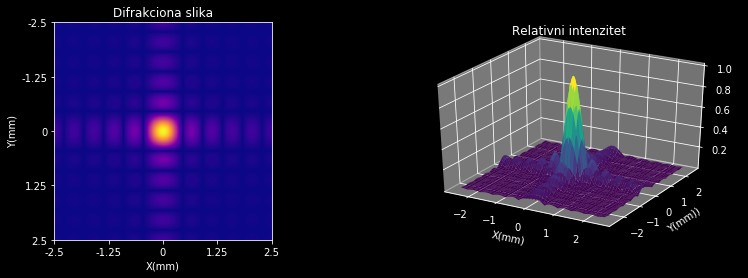

In [7]:
# Plotanje difrakcione slike i intenziteta zračenja
fig1 = plt.figure(figsize=plt.figaspect(.3))

ax1=fig1.add_subplot(1,2,1)
plt.imshow(np.abs(u2))
tick_locs = [0,262,524,786,1048]
tick_lbls = [-2.5,-1.25,0,1.25,2.5]
plt.xticks(tick_locs, tick_lbls)
plt.yticks(tick_locs, tick_lbls)
ax1.set_title('Difrakciona slika')
plt.xlabel('X(mm)')
plt.ylabel('Y(mm)')

ax2=fig1.add_subplot(1,2,2,projection='3d')
ax2=fig1.gca(projection='3d')
surf=ax2.plot_surface(x1,y1,np.abs(Isquare),cmap='viridis', edgecolor='none')
ax2.set_title('Relativni intenzitet')
plt.xlabel('X(mm)')
plt.ylabel('Y(mm))')
plt.show()

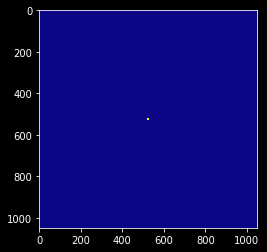

In [8]:
#DRUGI DIO - KRUŽNI OTOVOR

#Definisati radijus kruznog otvora
Radi=(x1**2+y1**2)**0.5
XX=np.where(np.abs(Radi) <= w/2,1,0)
YY=np.where(np.abs(Radi) <= w/2,1,0)

u3=XX*YY  #električno polje ima stalnu vrijednost u svakoj tački otvora
plt.imshow(u3)
plt.show()

In [9]:
#FOURIEROVA TRANSFORMACIJA I IZRAČUNAVANJE INTEGRALA
gg=u3
GG=fftshift(np.fft.fft2(gg))

hh=np.exp(1j*k*z)/1j*lamb*z*np.exp(1j*np.pi/(lamb*z)*(x1**2+y1**2))
HH=fftshift(np.fft.fft2(hh))
u4=hh*GG

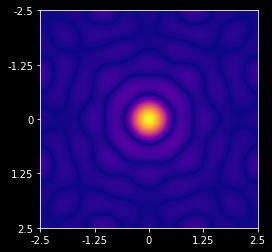

In [10]:
# DIFRAKCIONA SLIKA
plt.imshow(np.abs(u4))
tick_locs = [0,262,524,786,1048]
tick_lbls = [-2.5,-1.25,0,1.25,2.5]
plt.xticks(tick_locs, tick_lbls)
plt.yticks(tick_locs, tick_lbls)
plt.show()

In [11]:
# intenzitet zračnje (normiran na jedinicu)
Icirc=1./(lamb*z)**2*u4
Icirc=Icirc/Icirc.max()

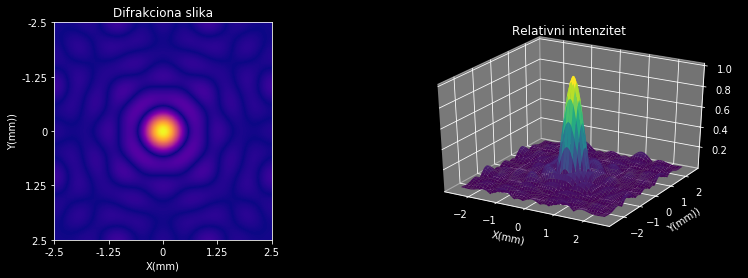

In [12]:
# Crtanje difrakcione slike i intenziteta zračenja
fig1 = plt.figure(figsize=plt.figaspect(.3))

ax1=fig1.add_subplot(1,2,1)
plt.imshow(np.abs(u4))
tick_locs = [0,262,524,786,1048]
tick_lbls = [-2.5,-1.25,0,1.25,2.5]
plt.xticks(tick_locs, tick_lbls)
plt.yticks(tick_locs, tick_lbls)
ax1.set_title('Difrakciona slika')
plt.xlabel('X(mm)')
plt.ylabel('Y(mm))')

ax2=fig1.add_subplot(1,2,2,projection='3d')
ax2=fig1.gca(projection='3d')
surf=ax2.plot_surface(x1,y1,np.abs(Icirc),cmap='viridis', edgecolor='none')
ax2.set_title('Relativni intenzitet')
plt.xlabel('X(mm)')
plt.ylabel('Y(mm))')
plt.show()

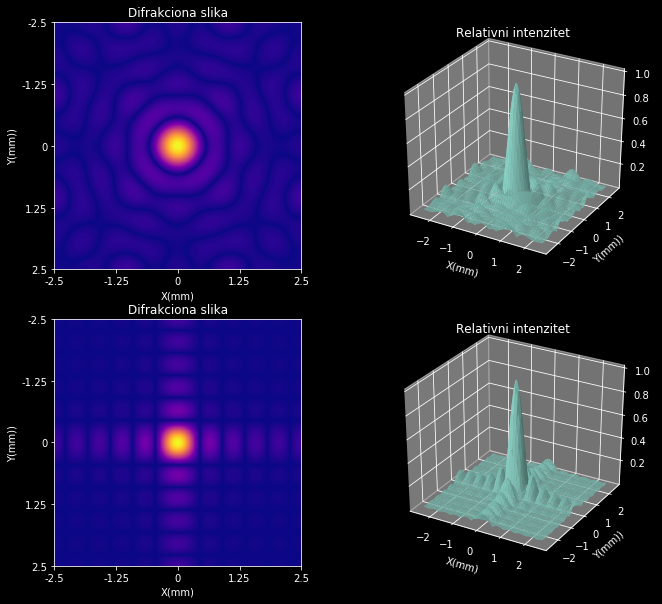

In [13]:
#REZIME - plotanje difrakcione slike i intenziteta zračenja za kvadratnu i kružnu pukotinu
fig1 = plt.figure(figsize=(11,10))

ax1=fig1.add_subplot(2,2,1)
plt.imshow(np.abs(u4))
tick_locs = [0,262,524,786,1048]
tick_lbls = [-2.5,-1.25,0,1.25,2.5]
plt.xticks(tick_locs, tick_lbls)
plt.yticks(tick_locs, tick_lbls)
ax1.set_title('Difrakciona slika')
plt.xlabel('X(mm)')
plt.ylabel('Y(mm))')

ax2=fig1.add_subplot(2,2,2,projection='3d')
ax2=fig1.gca(projection='3d')
surf=ax2.plot_surface(x1,y1,np.abs(Icirc), edgecolor='none')
ax2.set_title('Relativni intenzitet')
plt.xlabel('X(mm)')
plt.ylabel('Y(mm))')


ax3=fig1.add_subplot(2,2,3)
plt.imshow(np.abs(u2))
tick_locs = [0,262,524,786,1048]
tick_lbls = [-2.5,-1.25,0,1.25,2.5]
plt.xticks(tick_locs, tick_lbls)
plt.yticks(tick_locs, tick_lbls)
ax3.set_title('Difrakciona slika')
plt.xlabel('X(mm)')
plt.ylabel('Y(mm))')

ax4=fig1.add_subplot(2,2,4,projection='3d')
ax4=fig1.gca(projection='3d')
surf=ax4.plot_surface(x1,y1,np.abs(Isquare), edgecolor='none')
ax4.set_title('Relativni intenzitet')
plt.xlabel('X(mm)')
plt.ylabel('Y(mm))')
fig1.savefig('Fraunhofer_2d.png')
plt.show()